In [1]:
# - Import Libraries

import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)


# Read in the data

player_stats = pd.read_csv(r'C:\Users\mydnw\Downloads\NBA_players_clean.csv')
player_stats_advanced = pd.read_csv(r'C:\Users\mydnw\Downloads\Advanced.csv')
league_stats_adjusted = pd.read_csv(r'C:\Users\mydnw\Downloads\AdjusterEfficient.csv')
player_per_game = pd.read_csv(r'C:\Users\mydnw\Downloads\player_per_game.csv')
statistical_correlation = pd.read_csv(r'C:\Users\mydnw\Downloads\Statistical_Correlation.csv')

In [2]:
#View the data


pd.set_option('display.max_columns', None)
league_stats_adjusted.head()

,Season,Points,ORating,EffectiveFgPercentage,Pace,AdjustedScoring,AdjusterEfficient
0,2023,112.7,112.3,0.535,99.4,113.380282,1.006036
1,2021,112.1,112.3,0.538,99.2,113.004032,1.008065
2,2022,110.6,112.0,0.532,98.2,112.627291,1.018330
3,2020,111.8,110.6,0.529,100.3,111.465603,0.997009
4,2019,111.2,110.4,0.524,100.0,111.200000,1.000000


In [3]:
league_stats_adjusted.rename(columns=lambda x: x.strip())

,Season,Points,ORating,EffectiveFgPercentage,Pace,AdjustedScoring,AdjusterEfficient
0,2023,112.7,112.3,0.535,99.4,113.380282,1.006036
1,2021,112.1,112.3,0.538,99.2,113.004032,1.008065
2,2022,110.6,112.0,0.532,98.2,112.627291,1.018330
3,2020,111.8,110.6,0.529,100.3,111.465603,0.997009
4,2019,111.2,110.4,0.524,100.0,111.200000,1.000000
...,...,...,...,...,...,...,...
69,1954,79.5,NaN,0.372,NaN,NaN,NaN
70,1953,82.7,NaN,0.370,NaN,NaN,NaN
71,1952,83.7,NaN,0.367,NaN,NaN,NaN
72,1951,84.1,NaN,0.357,NaN,NaN,NaN


In [4]:
pd.set_option('display.max_columns', None)
player_stats.head()

,Player,From,To,Years,Pos,Ht,Height,Wt,G,PTS,TRB,AST,FG%,FG3%,FT%,eFG%,PER,WS,All Star,All NBA,All ABA,All Rookie,All Defensive,BLK Champ,STL Champ,TRB Champ,AST Champ,Scoring Champ,Most Improved,Sixth Man,DPOY,ROY,AS MVP,CF MVP,Finals MVP,MVP,Championships,NBA 75 Team,ABA All-Time Team
0,Alaa Abdelnaby,1991,1995,5,F-C,6-10,6.833333,240.0,256,5.7,3.3,0.3,50.2,0.0,70.1,50.2,13.0,4.8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Zaid Abdul-Aziz,1969,1978,10,F-C,6-9,6.750000,235.0,505,9.0,8.0,1.2,42.8,17.7,72.8,48.4,15.1,17.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Kareem Abdul-Jabbar*,1970,1989,20,C,7-2,7.166667,225.0,1560,24.6,11.2,3.6,55.9,5.6,72.1,55.9,24.6,273.4,19,15,0,1,11,4,0,1,0,2,0,0,0,1,0,0,2,6,6,1,0
3,Mahmoud Abdul-Rauf,1991,2001,11,G,6-1,6.083333,162.0,586,14.6,1.9,3.5,44.2,35.4,90.5,47.2,15.4,25.2,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,Tariq Abdul-Wahad,1998,2003,6,F,6-6,6.500000,223.0,236,7.8,3.3,1.1,41.7,23.7,70.3,42.2,11.4,3.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
pd.set_option('display.max_columns', None)
player_stats_advanced.head()

,seas_id,season,player_id,player,birth_year,pos,age,experience,lg,tm,g,mp,per,ts_percent,x3p_ar,f_tr,orb_percent,drb_percent,trb_percent,ast_percent,stl_percent,blk_percent,tov_percent,usg_percent,ows,dws,ws,ws_48,obpm,dbpm,bpm,vorp
0,30458,2023,5025,A.J. Green,NaN,SG,23.0,1,NBA,MIL,1,2.0,15.2,NaN,NaN,NaN,0.0,0.0,0.0,58.5,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.245,4.7,2.1,6.8,0.0
1,30459,2023,4219,Aaron Gordon,NaN,PF,27.0,9,NBA,DEN,7,198.0,15.9,0.559,0.299,0.260,8.5,16.1,12.2,9.7,0.2,4.1,10.4,20.6,0.2,0.1,0.3,0.074,0.1,-2.5,-2.4,0.0
2,30460,2023,4582,Aaron Holiday,NaN,PG,26.0,5,NBA,ATL,7,125.0,10.5,0.609,0.276,0.172,2.7,3.4,3.0,9.9,2.3,1.3,16.1,12.6,0.1,0.1,0.1,0.056,-2.2,-0.1,-2.3,0.0
3,30461,2023,4805,Aaron Nesmith,NaN,SF,23.0,3,NBA,IND,6,131.0,9.8,0.554,0.512,0.209,2.4,15.7,8.8,9.5,0.4,3.6,11.3,16.3,0.1,0.0,0.1,0.035,-3.1,-1.3,-4.5,-0.1
4,30462,2023,4900,Aaron Wiggins,NaN,SG,24.0,2,NBA,OKC,5,132.0,11.7,0.514,0.375,0.281,4.3,18.7,11.0,8.9,1.4,1.4,5.3,11.9,0.1,0.2,0.3,0.116,-1.9,0.0,-1.9,0.0


In [6]:
pd.set_option('display.max_columns', None)
player_per_game.head()

,seas_id,season,player_id,player,birth_year,pos,age,experience,lg,tm,g,gs,mp_per_game,fg_per_game,fga_per_game,fg_percent,x3p_per_game,x3pa_per_game,x3p_percent,x2p_per_game,x2pa_per_game,x2p_percent,e_fg_percent,ft_per_game,fta_per_game,ft_percent,orb_per_game,drb_per_game,trb_per_game,ast_per_game,stl_per_game,blk_per_game,tov_per_game,pf_per_game,pts_per_game
0,30458,2023,5025,A.J. Green,NaN,SG,23.0,1,NBA,MIL,1,0.0,2.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,30459,2023,4219,Aaron Gordon,NaN,PF,27.0,9,NBA,DEN,7,7.0,28.3,5.7,11.0,0.519,0.7,3.3,0.217,5.0,7.7,0.648,0.552,1.6,2.9,0.550,2.3,4.1,6.4,1.9,0.1,1.3,1.4,1.4,13.7
2,30460,2023,4582,Aaron Holiday,NaN,PG,26.0,5,NBA,ATL,7,0.0,17.9,2.0,4.1,0.483,0.7,1.1,0.625,1.3,3.0,0.429,0.569,0.7,0.7,1.000,0.4,0.6,1.0,1.4,0.9,0.3,0.9,1.3,5.4
3,30461,2023,4805,Aaron Nesmith,NaN,SF,23.0,3,NBA,IND,6,4.0,21.8,3.2,7.2,0.442,1.2,3.7,0.318,2.0,3.5,0.571,0.523,1.2,1.5,0.778,0.5,3.0,3.5,1.5,0.2,0.8,1.0,3.0,8.7
4,30462,2023,4900,Aaron Wiggins,NaN,SG,24.0,2,NBA,OKC,5,3.0,26.4,2.6,6.4,0.406,0.8,2.4,0.333,1.8,4.0,0.450,0.469,1.4,1.8,0.778,1.2,4.6,5.8,1.8,0.8,0.4,0.4,1.2,7.4


In [7]:
pd.set_option('display.max_columns', None)
statistical_correlation.head()

,Season,PTS,TRB,AST,STL,BLK,Pace
0,1974,105.7,48.2,24.6,8.7,4.7,107.8
1,1978,108.5,47.1,25.0,9.6,5.1,106.7
2,1977,106.5,47.1,23.9,9.4,5.1,106.5
3,1979,110.3,45.2,25.8,9.1,5.4,105.8
4,1976,104.3,47.4,23.0,8.9,4.4,105.5


In [8]:
#Some of the column names have caps some do not so switching all to lowercase


player_stats.columns= player_stats.columns.str.lower()
player_stats_advanced.columns= player_stats_advanced.columns.str.lower()
league_stats_adjusted.columns= league_stats_adjusted.columns.str.lower()
player_per_game.columns= player_per_game.columns.str.lower()
statistical_correlation.columns= statistical_correlation.columns.str.lower()

In [9]:
statistical_correlation.head()

,season,pts,trb,ast,stl,blk,pace
0,1974,105.7,48.2,24.6,8.7,4.7,107.8
1,1978,108.5,47.1,25.0,9.6,5.1,106.7
2,1977,106.5,47.1,23.9,9.4,5.1,106.5
3,1979,110.3,45.2,25.8,9.1,5.4,105.8
4,1976,104.3,47.4,23.0,8.9,4.4,105.5


In [10]:
#Some of the player names have inconsistencies with capitalization. Set all to lowercase
#Some players also have asterisks at end of name. Needs to be removed for calculations


player_stats['player'] = player_stats['player'].str.lower()
player_stats_advanced['player'] = player_stats_advanced['player'].str.lower()
player_per_game['player'] = player_per_game['player'].str.lower()
player_stats['player'] = player_stats['player'].str.replace('*', '', regex = True)
player_stats_advanced['player'] = player_stats_advanced['player'].str.replace('*', '', regex = True)
player_per_game['player'] = player_per_game['player'].str.replace('*', '', regex = True)

In [11]:
player_stats.head()

,player,from,to,years,pos,ht,height,wt,g,pts,trb,ast,fg%,fg3%,ft%,efg%,per,ws,all star,all nba,all aba,all rookie,all defensive,blk champ,stl champ,trb champ,ast champ,scoring champ,most improved,sixth man,dpoy,roy,as mvp,cf mvp,finals mvp,mvp,championships,nba 75 team,aba all-time team
0,alaa abdelnaby,1991,1995,5,F-C,6-10,6.833333,240.0,256,5.7,3.3,0.3,50.2,0.0,70.1,50.2,13.0,4.8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,zaid abdul-aziz,1969,1978,10,F-C,6-9,6.750000,235.0,505,9.0,8.0,1.2,42.8,17.7,72.8,48.4,15.1,17.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,kareem abdul-jabbar,1970,1989,20,C,7-2,7.166667,225.0,1560,24.6,11.2,3.6,55.9,5.6,72.1,55.9,24.6,273.4,19,15,0,1,11,4,0,1,0,2,0,0,0,1,0,0,2,6,6,1,0
3,mahmoud abdul-rauf,1991,2001,11,G,6-1,6.083333,162.0,586,14.6,1.9,3.5,44.2,35.4,90.5,47.2,15.4,25.2,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,tariq abdul-wahad,1998,2003,6,F,6-6,6.500000,223.0,236,7.8,3.3,1.1,41.7,23.7,70.3,42.2,11.4,3.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [12]:
player_per_game.dtypes

seas_id            int64
season             int64
player_id          int64
player            object
birth_year       float64
pos               object
age              float64
experience         int64
lg                object
tm                object
g                  int64
gs               float64
mp_per_game      float64
fg_per_game      float64
fga_per_game     float64
fg_percent       float64
x3p_per_game     float64
x3pa_per_game    float64
x3p_percent      float64
x2p_per_game     float64
x2pa_per_game    float64
x2p_percent      float64
e_fg_percent     float64
ft_per_game      float64
fta_per_game     float64
ft_percent       float64
orb_per_game     float64
drb_per_game     float64
trb_per_game     float64
ast_per_game     float64
stl_per_game     float64
blk_per_game     float64
tov_per_game     float64
pf_per_game      float64
pts_per_game     float64
dtype: object

In [13]:
#Check for specific player

player_stats_advanced.loc[player_stats_advanced['player'] == 'michael jordan']

,seas_id,season,player_id,player,birth_year,pos,age,experience,lg,tm,g,mp,per,ts_percent,x3p_ar,f_tr,orb_percent,drb_percent,trb_percent,ast_percent,stl_percent,blk_percent,tov_percent,usg_percent,ows,dws,ws,ws_48,obpm,dbpm,bpm,vorp
12488,18568,2003,2193,michael jordan,NaN,SF,39.0,15,NBA,WAS,82,3031.0,19.3,0.491,0.036,0.212,2.8,16.7,9.7,21.1,2.2,1.0,9.4,28.7,2.9,3.4,6.2,0.099,1.8,0.0,1.7,2.8
12979,18076,2002,2193,michael jordan,NaN,SF,38.0,14,NBA,WAS,60,2093.0,20.7,0.468,0.040,0.252,2.7,16.2,9.4,30.8,2.2,0.9,9.9,36.0,1.2,2.1,3.3,0.075,3.2,-0.1,3.1,2.7
15071,16041,1998,2193,michael jordan,NaN,SG,34.0,13,NBA,CHI,82,3181.0,25.2,0.533,0.067,0.381,4.7,12.5,8.5,18.0,2.4,1.0,7.7,33.7,10.4,5.4,15.8,0.238,5.9,1.0,6.9,7.1
15635,15484,1997,2193,michael jordan,NaN,SG,33.0,12,NBA,CHI,82,3106.0,27.8,0.567,0.157,0.304,4.2,13.2,8.8,21.2,2.4,1.1,7.2,33.2,13.3,5.0,18.3,0.283,7.8,1.1,8.9,8.6
16183,14913,1996,2193,michael jordan,NaN,SG,32.0,11,NBA,CHI,82,3090.0,29.4,0.582,0.141,0.355,5.6,14.9,10.2,21.2,3.1,1.0,8.4,33.3,14.2,6.2,20.4,0.317,8.3,2.2,10.5,9.8
16659,14392,1995,2193,michael jordan,NaN,SG,31.0,10,NBA,CHI,17,668.0,22.1,0.493,0.079,0.337,4.4,16.2,10.3,24.2,2.3,1.5,7.0,33.2,1.2,1.1,2.3,0.167,3.6,0.6,4.2,1.1
17589,13459,1993,2193,michael jordan,NaN,SG,29.0,9,NBA,CHI,78,3067.0,29.7,0.564,0.115,0.284,4.9,15.1,9.8,25.2,3.7,1.3,8.4,34.7,12.0,5.2,17.2,0.270,8.7,2.6,11.2,10.2
18027,12990,1992,2193,michael jordan,NaN,SG,28.0,8,NBA,CHI,80,3102.0,27.7,0.579,0.055,0.325,3.5,15.3,9.5,25.7,3.0,1.5,8.8,31.7,12.1,5.6,17.7,0.274,7.2,2.5,9.7,9.2
18479,12543,1991,2193,michael jordan,NaN,SG,27.0,7,NBA,CHI,82,3034.0,31.6,0.605,0.051,0.365,4.6,14.3,9.5,25.2,3.7,1.7,8.7,32.9,14.9,5.4,20.3,0.321,8.9,3.2,12.0,10.8
18915,12079,1990,2193,michael jordan,NaN,SG,26.0,6,NBA,CHI,82,3197.0,31.2,0.606,0.125,0.356,5.3,15.6,10.4,28.6,3.5,1.1,9.8,33.7,14.7,4.3,19.0,0.285,9.1,2.1,11.2,10.6


In [14]:
#Sort by 50 best win share seasons all time by players with at least 20 minutes per game that season

(player_stats_advanced[player_stats_advanced.mp >= (20 * player_stats_advanced.g)].sort_values(by=['ws'], inplace=False, ascending=False)).head(n=50)

,seas_id,season,player_id,player,birth_year,pos,age,experience,lg,tm,g,mp,per,ts_percent,x3p_ar,f_tr,orb_percent,drb_percent,trb_percent,ast_percent,stl_percent,blk_percent,tov_percent,usg_percent,ows,dws,ws,ws_48,obpm,dbpm,bpm,vorp
25959,5043,1972,1204,kareem abdul-jabbar,NaN,C,24.0,3,NBA,MIL,81,3583.0,29.9,0.603,NaN,0.363,NaN,NaN,18.1,16.1,NaN,NaN,NaN,NaN,18.3,7.1,25.4,0.340,NaN,NaN,NaN,NaN
28310,2718,1964,699,wilt chamberlain,NaN,C,27.0,5,NBA,SFW,80,3689.0,31.6,0.537,NaN,0.442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.4,10.6,25.0,0.325,NaN,NaN,NaN,NaN
28574,2445,1962,699,wilt chamberlain,NaN,C,25.0,3,NBA,PHW,80,3882.0,32.1,0.536,NaN,0.431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.1,6.0,23.1,0.286,NaN,NaN,NaN,NaN
26404,4581,1971,1204,kareem abdul-jabbar,NaN,C,23.0,2,NBA,MIL,82,3288.0,29.0,0.606,NaN,0.370,NaN,NaN,18.9,12.2,NaN,NaN,NaN,NaN,17.0,5.3,22.3,0.326,NaN,NaN,NaN,NaN
27908,3118,1967,699,wilt chamberlain,NaN,C,30.0,8,NBA,PHI,81,3682.0,26.5,0.637,NaN,0.761,NaN,NaN,NaN,21.7,NaN,NaN,NaN,NaN,14.8,7.0,21.9,0.285,NaN,NaN,NaN,NaN
25509,5481,1973,1204,kareem abdul-jabbar,NaN,C,25.0,4,NBA,MIL,76,3254.0,28.5,0.580,NaN,0.260,NaN,NaN,18.2,17.9,NaN,NaN,NaN,NaN,14.4,7.5,21.9,0.322,NaN,NaN,NaN,NaN
28042,2984,1966,699,wilt chamberlain,NaN,C,29.0,7,NBA,PHI,79,3737.0,28.3,0.547,NaN,0.490,NaN,NaN,NaN,16.8,NaN,NaN,NaN,NaN,12.9,8.5,21.4,0.275,NaN,NaN,NaN,NaN
19805,11208,1988,2193,michael jordan,NaN,SG,24.0,4,NBA,CHI,82,3311.0,31.7,0.603,0.027,0.430,4.8,10.7,7.8,27.0,3.9,2.4,9.6,34.1,15.2,6.1,21.2,0.308,8.8,4.2,13.0,12.5
28440,2580,1963,699,wilt chamberlain,NaN,C,26.0,4,NBA,SFW,80,3806.0,31.8,0.550,NaN,0.402,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0,5.0,20.9,0.264,NaN,NaN,NaN,NaN
28281,2689,1964,713,oscar robertson,NaN,PG,25.0,4,NBA,CIN,79,3559.0,27.6,0.576,NaN,0.539,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.2,4.4,20.6,0.278,NaN,NaN,NaN,NaN


In [15]:
#prep a dataframe merge between player_per_game and league_stats_adjusted on Season Column

print(player_per_game.columns)
print(league_stats_adjusted.columns)

Index(['seas_id', 'season', 'player_id', 'player', 'birth_year', 'pos', 'age',
       'experience', 'lg', 'tm', 'g', 'gs', 'mp_per_game', 'fg_per_game',
       'fga_per_game', 'fg_percent', 'x3p_per_game', 'x3pa_per_game',
       'x3p_percent', 'x2p_per_game', 'x2pa_per_game', 'x2p_percent',
       'e_fg_percent', 'ft_per_game', 'fta_per_game', 'ft_percent',
       'orb_per_game', 'drb_per_game', 'trb_per_game', 'ast_per_game',
       'stl_per_game', 'blk_per_game', 'tov_per_game', 'pf_per_game',
       'pts_per_game'],
      dtype='object')
Index(['season', 'points', 'orating', 'effectivefgpercentage', 'pace',
       'adjustedscoring', 'adjusterefficient'],
      dtype='object')


In [16]:
#merge two dataframes to create adjusted [per game calculations]

per_game_plus_league = pd.merge(player_per_game, league_stats_adjusted, how='inner', on='season')
per_game_plus_league.head()

,seas_id,season,player_id,player,birth_year,pos,age,experience,lg,tm,g,gs,mp_per_game,fg_per_game,fga_per_game,fg_percent,x3p_per_game,x3pa_per_game,x3p_percent,x2p_per_game,x2pa_per_game,x2p_percent,e_fg_percent,ft_per_game,fta_per_game,ft_percent,orb_per_game,drb_per_game,trb_per_game,ast_per_game,stl_per_game,blk_per_game,tov_per_game,pf_per_game,pts_per_game,points,orating,effectivefgpercentage,pace,adjustedscoring,adjusterefficient
0,30458,2023,5025,a.j. green,NaN,SG,23.0,1,NBA,MIL,1,0.0,2.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,112.7,112.3,0.535,99.4,113.380282,1.006036
1,30459,2023,4219,aaron gordon,NaN,PF,27.0,9,NBA,DEN,7,7.0,28.3,5.7,11.0,0.519,0.7,3.3,0.217,5.0,7.7,0.648,0.552,1.6,2.9,0.550,2.3,4.1,6.4,1.9,0.1,1.3,1.4,1.4,13.7,112.7,112.3,0.535,99.4,113.380282,1.006036
2,30460,2023,4582,aaron holiday,NaN,PG,26.0,5,NBA,ATL,7,0.0,17.9,2.0,4.1,0.483,0.7,1.1,0.625,1.3,3.0,0.429,0.569,0.7,0.7,1.000,0.4,0.6,1.0,1.4,0.9,0.3,0.9,1.3,5.4,112.7,112.3,0.535,99.4,113.380282,1.006036
3,30461,2023,4805,aaron nesmith,NaN,SF,23.0,3,NBA,IND,6,4.0,21.8,3.2,7.2,0.442,1.2,3.7,0.318,2.0,3.5,0.571,0.523,1.2,1.5,0.778,0.5,3.0,3.5,1.5,0.2,0.8,1.0,3.0,8.7,112.7,112.3,0.535,99.4,113.380282,1.006036
4,30462,2023,4900,aaron wiggins,NaN,SG,24.0,2,NBA,OKC,5,3.0,26.4,2.6,6.4,0.406,0.8,2.4,0.333,1.8,4.0,0.450,0.469,1.4,1.8,0.778,1.2,4.6,5.8,1.8,0.8,0.4,0.4,1.2,7.4,112.7,112.3,0.535,99.4,113.380282,1.006036


In [17]:
per_game_plus_league.loc[per_game_plus_league['player'] == 'michael jordan'].head()

,seas_id,season,player_id,player,birth_year,pos,age,experience,lg,tm,g,gs,mp_per_game,fg_per_game,fga_per_game,fg_percent,x3p_per_game,x3pa_per_game,x3p_percent,x2p_per_game,x2pa_per_game,x2p_percent,e_fg_percent,ft_per_game,fta_per_game,ft_percent,orb_per_game,drb_per_game,trb_per_game,ast_per_game,stl_per_game,blk_per_game,tov_per_game,pf_per_game,pts_per_game,points,orating,effectivefgpercentage,pace,adjustedscoring,adjusterefficient
12488,18568,2003,2193,michael jordan,NaN,SF,39.0,15,NBA,WAS,82,67.0,37.0,8.3,18.6,0.445,0.2,0.7,0.291,8.1,18.0,0.450,0.450,3.2,4.0,0.821,0.9,5.2,6.1,3.8,1.5,0.5,2.1,2.1,20.0,95.1,103.6,0.474,91.0,104.505494,1.098901
12979,18076,2002,2193,michael jordan,NaN,SF,38.0,14,NBA,WAS,60,53.0,34.9,9.2,22.1,0.416,0.2,0.9,0.189,9.0,21.2,0.426,0.420,4.4,5.6,0.790,0.8,4.8,5.7,5.2,1.4,0.4,2.7,2.0,22.9,95.5,104.5,0.477,90.7,105.292172,1.102536
15071,16041,1998,2193,michael jordan,NaN,SG,34.0,13,NBA,CHI,82,82.0,38.8,10.7,23.1,0.465,0.4,1.5,0.238,10.4,21.5,0.482,0.473,6.9,8.8,0.784,1.6,4.2,5.8,3.5,1.7,0.5,2.3,1.8,28.7,95.6,105.0,0.478,90.3,105.869325,1.107420
15635,15484,1997,2193,michael jordan,NaN,SG,33.0,12,NBA,CHI,82,82.0,37.9,11.2,23.1,0.486,1.4,3.6,0.374,9.9,19.5,0.507,0.516,5.9,7.0,0.833,1.4,4.5,5.9,4.3,1.7,0.5,2.0,1.9,29.6,96.9,106.7,0.493,90.1,107.547170,1.109878
16183,14913,1996,2193,michael jordan,NaN,SG,32.0,11,NBA,CHI,82,82.0,37.7,11.2,22.6,0.495,1.4,3.2,0.427,9.8,19.4,0.506,0.525,6.7,8.0,0.834,1.8,4.8,6.6,4.3,2.2,0.5,2.4,2.4,30.4,99.5,107.6,0.499,91.8,108.387800,1.089325


In [18]:
per_game_plus_league['adjusted_scoring_per_game'] = per_game_plus_league['pts_per_game']*per_game_plus_league['adjusterefficient']
per_game_plus_league.head()

,seas_id,season,player_id,player,birth_year,pos,age,experience,lg,tm,g,gs,mp_per_game,fg_per_game,fga_per_game,fg_percent,x3p_per_game,x3pa_per_game,x3p_percent,x2p_per_game,x2pa_per_game,x2p_percent,e_fg_percent,ft_per_game,fta_per_game,ft_percent,orb_per_game,drb_per_game,trb_per_game,ast_per_game,stl_per_game,blk_per_game,tov_per_game,pf_per_game,pts_per_game,points,orating,effectivefgpercentage,pace,adjustedscoring,adjusterefficient,adjusted_scoring_per_game
0,30458,2023,5025,a.j. green,NaN,SG,23.0,1,NBA,MIL,1,0.0,2.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,112.7,112.3,0.535,99.4,113.380282,1.006036,0.000000
1,30459,2023,4219,aaron gordon,NaN,PF,27.0,9,NBA,DEN,7,7.0,28.3,5.7,11.0,0.519,0.7,3.3,0.217,5.0,7.7,0.648,0.552,1.6,2.9,0.550,2.3,4.1,6.4,1.9,0.1,1.3,1.4,1.4,13.7,112.7,112.3,0.535,99.4,113.380282,1.006036,13.782696
2,30460,2023,4582,aaron holiday,NaN,PG,26.0,5,NBA,ATL,7,0.0,17.9,2.0,4.1,0.483,0.7,1.1,0.625,1.3,3.0,0.429,0.569,0.7,0.7,1.000,0.4,0.6,1.0,1.4,0.9,0.3,0.9,1.3,5.4,112.7,112.3,0.535,99.4,113.380282,1.006036,5.432596
3,30461,2023,4805,aaron nesmith,NaN,SF,23.0,3,NBA,IND,6,4.0,21.8,3.2,7.2,0.442,1.2,3.7,0.318,2.0,3.5,0.571,0.523,1.2,1.5,0.778,0.5,3.0,3.5,1.5,0.2,0.8,1.0,3.0,8.7,112.7,112.3,0.535,99.4,113.380282,1.006036,8.752515
4,30462,2023,4900,aaron wiggins,NaN,SG,24.0,2,NBA,OKC,5,3.0,26.4,2.6,6.4,0.406,0.8,2.4,0.333,1.8,4.0,0.450,0.469,1.4,1.8,0.778,1.2,4.6,5.8,1.8,0.8,0.4,0.4,1.2,7.4,112.7,112.3,0.535,99.4,113.380282,1.006036,7.444668


In [19]:
result = per_game_plus_league.groupby(['player_id','player'], as_index=False)['adjusted_scoring_per_game'].mean()
result.loc[result['player'] == 'kareem abdul-jabbar']

,player_id,player,adjusted_scoring_per_game
1012,1204,kareem abdul-jabbar,22.102366


In [20]:
player_stats.loc[player_stats['player'] == 'kareem abdul-jabbar']

,player,from,to,years,pos,ht,height,wt,g,pts,trb,ast,fg%,fg3%,ft%,efg%,per,ws,all star,all nba,all aba,all rookie,all defensive,blk champ,stl champ,trb champ,ast champ,scoring champ,most improved,sixth man,dpoy,roy,as mvp,cf mvp,finals mvp,mvp,championships,nba 75 team,aba all-time team
2,kareem abdul-jabbar,1970,1989,20,C,7-2,7.166667,225.0,1560,24.6,11.2,3.6,55.9,5.6,72.1,55.9,24.6,273.4,19,15,0,1,11,4,0,1,0,2,0,0,0,1,0,0,2,6,6,1,0


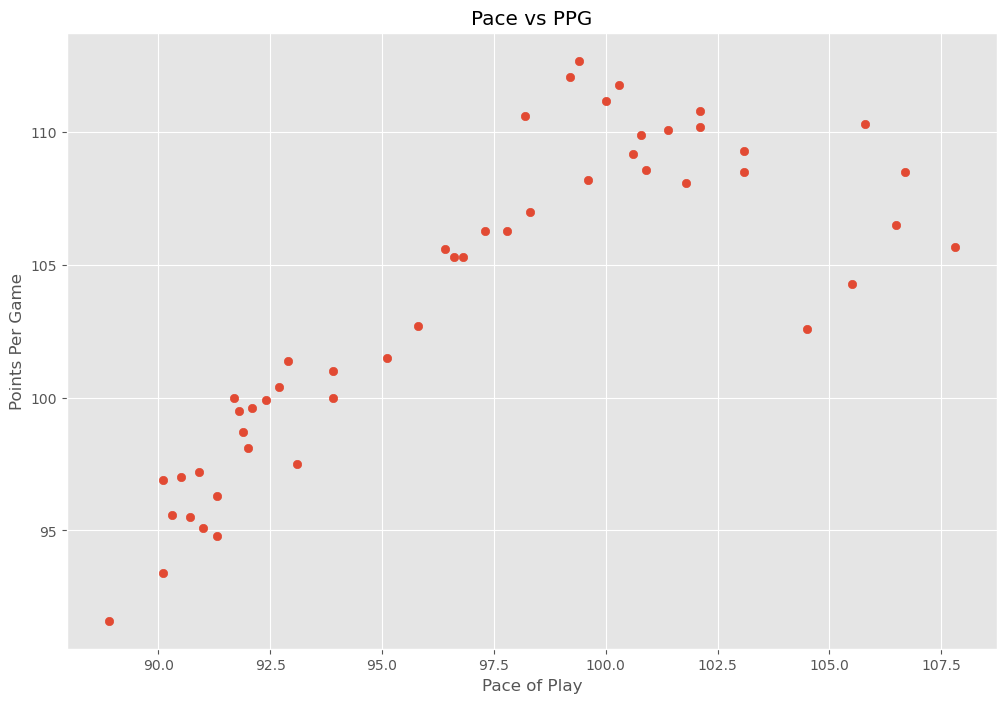

In [21]:
#Checking correlation between pace and the 5 different major statistics
#Start with scatter plot between pace and ppg


plt.scatter(x=statistical_correlation['pace'], y=statistical_correlation['pts'])


plt.title('Pace vs PPG')

plt.xlabel('Pace of Play')

plt.ylabel('Points Per Game')

plt.show()

<AxesSubplot:xlabel='pace', ylabel='pts'>

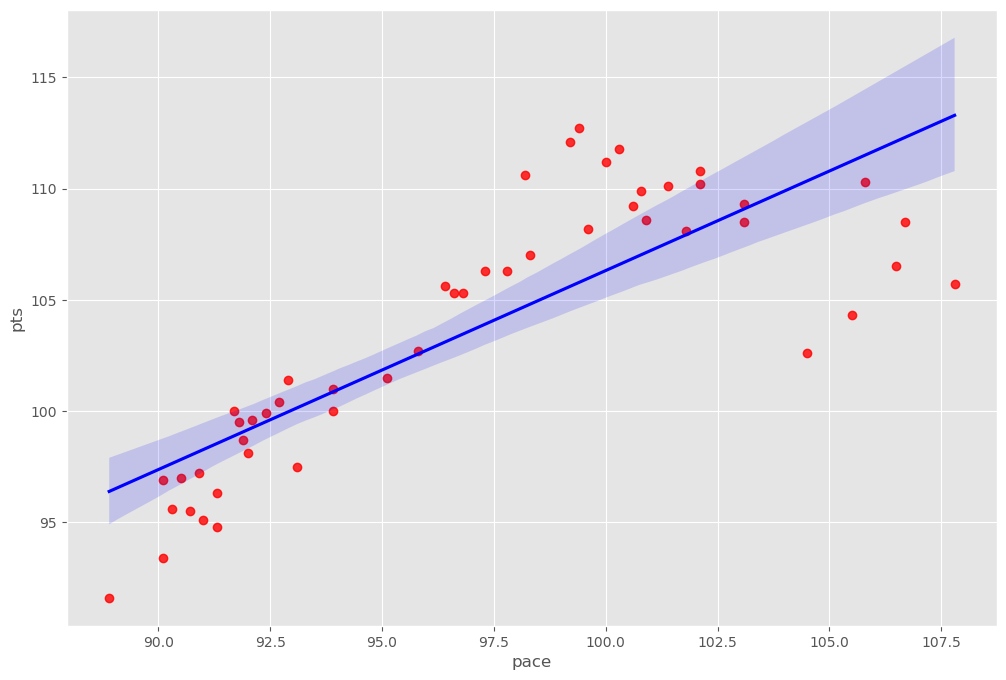

In [22]:
#Plot pace vs ppg using Seaborn

sns.regplot(x='pace', y='pts', data = statistical_correlation, scatter_kws={"color": "red"}, line_kws={"color": "blue"})

In [23]:
statistical_correlation.corr()

,season,pts,trb,ast,stl,blk,pace
season,1.000000,0.009307,-0.732936,0.081814,-0.871685,-0.346977,-0.596436
pts,0.009307,1.000000,0.397755,0.580298,0.381532,0.266100,0.820155
trb,-0.732936,0.397755,1.000000,-0.215825,0.587774,-0.091091,0.892707
ast,0.081814,0.580298,-0.215825,1.000000,0.654929,0.527709,0.815121
stl,-0.871685,0.381532,0.587774,0.654929,1.000000,0.448932,0.681187
blk,-0.346977,0.266100,-0.091091,0.527709,0.448932,1.000000,0.143872
pace,-0.596436,0.820155,0.892707,0.815121,0.681187,0.143872,1.000000


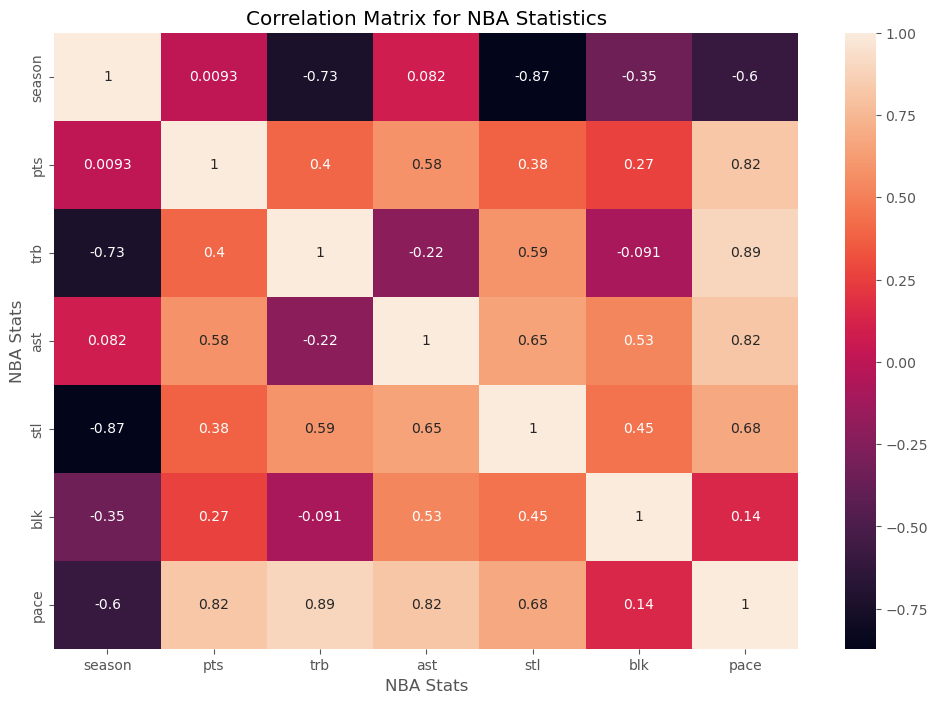

In [24]:
correlation_matrix = statistical_correlation.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for NBA Statistics')

plt.xlabel('NBA Stats')

plt.ylabel('NBA Stats')

plt.show()

In [25]:
#We can see that Points, Rebounds, Assists, and Steals all have strong positive correlation with pace.
#As pace increases we can also expect these statistics to increase while blocks does not have a correlation
#We will adjust those stats to do historical statistical analysis with players from differing eras